# WstÄ™p

MoÅ¼e siÄ™ wydawaÄ‡, Å¼e Polska jest szczegÃ³lnym miejscem jeÅ›li chodzi o zmianÄ™ klimatu. W sumie czasem pada Å›nieg albo jest zimno, czasem latem trzeba zakÅ‚adaÄ‡ kurtkÄ™, etc. SpÃ³jrzmy, co zmieniÅ‚o siÄ™ na przestrzeni lat.

ZbiÃ³r danych przetwarzany tutaj opisuje **temperaturÄ™ lÄ…du**, nie temperaturÄ™ powietrza. LÄ…d ogrzewa siÄ™ szybciej niÅ¼ powietrze, wiÄ™c Å‚atwiej z niego wyÅ‚owiÄ‡ trendy.

Na poczÄ…tku analizy posiÅ‚kowaÅ‚em siÄ™ trochÄ™ [tym wpisem][1] [Tomasza Tomaszewskiego][2], ale w koÅ„cu zrozumiaÅ‚em to i owo i dopisaÅ‚em kilka rzeczy, a z kilku zrezygnowaÅ‚em.

### Uwaga

Nie chciaÅ‚em umieszczaÄ‡ w repozytorium caÅ‚ego zbioru danych, gdyÅ¼ waÅ¼y on okoÅ‚o 500MB. W zwiÄ…zku z tym ograniczyÅ‚em go tylko do Polski. JeÅ›li chcesz coÅ› policzyÄ‡ na danych z caÅ‚ego Å›wiata, caÅ‚y zbiÃ³r moÅ¼esz Å›ciÄ…gnÄ…Ä‡ [na kaggle][3].

Zaczynamy.

Najpierw kilka ustawieÅ„ poczÄ…tkowych i import potrzebnych bibliotek.

  [1]: https://medium.com/@tkwadrat/gor%C4%85cy-kwietniowy-weekend-czas-na-small-talk-w-oparciu-o-dane-c4d0c158c013
  [2]: https://twitter.com/tkwadrat
  [3]: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar, datetime

sns.set(style='whitegrid', palette='Set2')

CITY = 'Torun'
SELECTED_CITIES = ['Torun', 'Cracow', 'Katowice', 'Olsztyn', 'Szczecin', 'Bialystok',
                   'Zielona Gora', 'Warsaw', 'Poznan', 'Bialystok', 'Wroclaw']


START_YEAR = 1753
MONTH = int(datetime.datetime.now().strftime("%m"))
# when global average temperature started to rise
RISE_START_YEAR = 1970

# Baseline years
BASE_YEAR_START = 1850
BASE_YEAR_END = 1900

Teraz wczytujemy dane z udostÄ™pnionego zbioru i czyÅ›cimy je z niepotrzebnych w tej analizie informacji.

In [2]:
df = pd.read_csv('./data/climate/GlobalLandTemperaturesByCityPoland.csv')

date_index = pd.to_datetime(df['dt'], format='%Y-%m-%d', errors='ignore')

df['di'] = date_index
df['Year'] = df['di'].dt.year
df['Month'] = df['di'].dt.month
df['Day'] = df['di'].dt.day

poland = df
poland_clean = poland.copy()

poland_clean.drop('Latitude', axis=1, inplace=True)
poland_clean.drop('Longitude', axis=1, inplace=True)
poland_clean.drop('AverageTemperatureUncertainty', axis=1, inplace=True)
poland_clean.drop('Country', axis=1, inplace=True)
poland_clean.drop('dt', axis=1, inplace=True)

city = df[df['City'] == CITY].dropna().copy()
climate_city = city[city['Year'] >= START_YEAR].copy()
month_city = climate_city[climate_city['Month'] == MONTH].copy()
current_month_city = month_city[month_city['Year'] > RISE_START_YEAR]
baseline_month_city = month_city[
    month_city['Year'].between(BASE_YEAR_START, BASE_YEAR_END)].copy()

Do dyspozycji w Polsce miaÅ‚em nastÄ™pujÄ…ce miasta:

In [3]:
poland['City'].unique()

array(['Bialystok', 'Bielsko Biala', 'Bydgoszcz', 'Bytom', 'Chorzow',
       'Cracow', 'Czestochowa', 'Dabrowa Gornicza', 'Elblag', 'Gdansk',
       'Gdynia', 'Gliwice', 'Gorzow Wielkopolski', 'Kalisz', 'Katowice',
       'Kielce', 'Koszalin', 'Legnica', 'Lublin', 'Olsztyn', 'Opole',
       'Plock', 'Poznan', 'Radom', 'Ruda Slaska', 'Rybnik', 'Rzeszow',
       'Sosnowiec', 'Szczecin', 'Tarnow', 'Torun', 'Tychy', 'Walbrzych',
       'Warsaw', 'Wloclawek', 'Wroclaw', 'Zabrze', 'Zielona Gora'], dtype=object)

Wybierzmy kilka i zobaczmy, jak siÄ™ zmieniaÅ‚a dla nich temperatura na przestrzeni lat.

To co widaÄ‡ na poniÅ¼szym wykresie to znaczÄ…cy wzrost Å›rednich temperatur od poczÄ…tku XX wieku. Dane koÅ„czÄ… siÄ™ na roku 2013 i do tej chwili Å›rednia temperatura wzrosÅ‚a o 1 stopieÅ„.

Ciekawe jest to, Å¼e najchÅ‚odniejsze z miast (BiaÅ‚ystok) ma Å›redniÄ… temperaturÄ™ niÅ¼szÄ… o ponad 2 stopnie od najcieplejszego (Zielonej GÃ³ry).

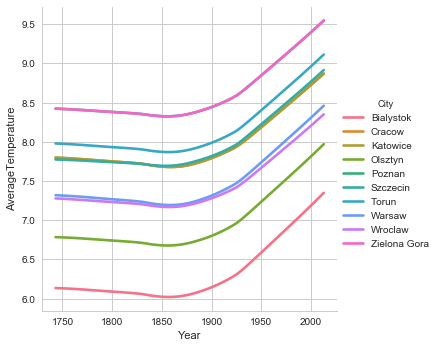

In [4]:
sns.lmplot(x='Year', y='AverageTemperature', hue='City', data=poland[poland['City'].isin(SELECTED_CITIES)], 
           scatter=False, lowess=True)

#Analiza dla Torunia

Sam mieszkam obecnie w Toruniu i dlatego analizÄ™ przeprowadzÄ™ dla tego wÅ‚aÅ›nie miasta.

CzÄ™Å›Ä‡ wykresÃ³w dotyczyÄ‡ bÄ™dzie obecnego miesiÄ…ca (tego, w ktÃ³rym uruchomiÄ™ notebook albo w ktÃ³rym Ty go sforkujesz i uruchomisz ;) )

PrÃ³bka zbioru danych dla Torunia po usuniÄ™ciu kolumn, ktÃ³re mnie nie interesowaÅ‚y, wyglÄ…da tak:

In [5]:
climate_city.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
97280  1753-01-01              -5.024                          7.544  Torun   
97281  1753-02-01              -3.030                          3.273  Torun   
97282  1753-03-01               4.348                          3.302  Torun   
97283  1753-04-01               9.217                          6.484  Torun   
97284  1753-05-01              13.580                          1.963  Torun   

      Country Latitude Longitude         di  Year  Month  Day  
97280  Poland   52.24N    18.39E 1753-01-01  1753      1    1  
97281  Poland   52.24N    18.39E 1753-02-01  1753      2    1  
97282  Poland   52.24N    18.39E 1753-03-01  1753      3    1  
97283  Poland   52.24N    18.39E 1753-04-01  1753      4    1  
97284  Poland   52.24N    18.39E 1753-05-01  1753      5    1

Od 1753 roku mamy peÅ‚ne dane. WidaÄ‡ teÅ¼, Å¼e sÄ… to Å›rednie z caÅ‚ego miesiÄ…ca.

Na poczÄ…tek sprawdÅºmy jaka byÅ‚a Å›rednia temperatura w aktualnym miesiÄ…cu od 1753 i 1970 roku. W 1970 uÅ›redniona temperatura caÅ‚ego Å›wiata zaczÄ™Å‚a dramatycznie rosnÄ…Ä‡.

NaleÅ¼y wziÄ…Ä‡ pod uwagÄ™, Å¼e naukowcy badajÄ…cy klimat odchylenia od Å›redniej mierzÄ… wzglÄ™dem okresu **1850-1900** (o tym wiÄ™cej poniÅ¼ej).

In [6]:
print("Average temperature in {city} in {from_year}-2013: {temperature}".format(
    city=calendar.month_name[MONTH],
    from_year=START_YEAR,
    temperature=month_city['AverageTemperature'].mean()
))
print("Average temperature in {city} in {from_year}-2013: {temperature}".format(
    city=calendar.month_name[MONTH],
    from_year=RISE_START_YEAR,
    temperature=current_month_city['AverageTemperature'].mean()
))
print("Average temperature in {city} in {from_year}-{to_year}: {temperature} (baseline)".format(
    city=calendar.month_name[MONTH],
    from_year=BASE_YEAR_START,
    to_year=BASE_YEAR_END,
    temperature=baseline_month_city['AverageTemperature'].mean()
))

Average temperature in September in 1753-2013: 14.08733076923077
Average temperature in September in 1970-2013: 14.224523809523811
Average temperature in September in 1850-1900: 13.92435294117647 (baseline)


PoniÅ¼szy wykres przedstawia rozkÅ‚ad temperatur w caÅ‚ym roku i w miesiÄ…cu zdefiniowanym w `MONTH`.

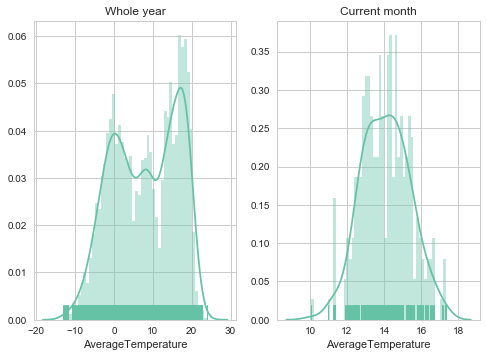

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(climate_city['AverageTemperature'], bins=50, rug=True, ax=ax1)
ax1.set_title("Whole year")
sns.distplot(month_city['AverageTemperature'], bins=50, rug=True, ax=ax2)
ax2.set_title("Current month")
plt.show()

NastÄ™pny wykres przedstawia zmiany Å›redniej temperatury na przestrzeni lat we wszystkich miesiÄ…cach. DokÅ‚adniej rzecz ujmujÄ…c nie jest to Å›rednia, tylko krzywa regresji.

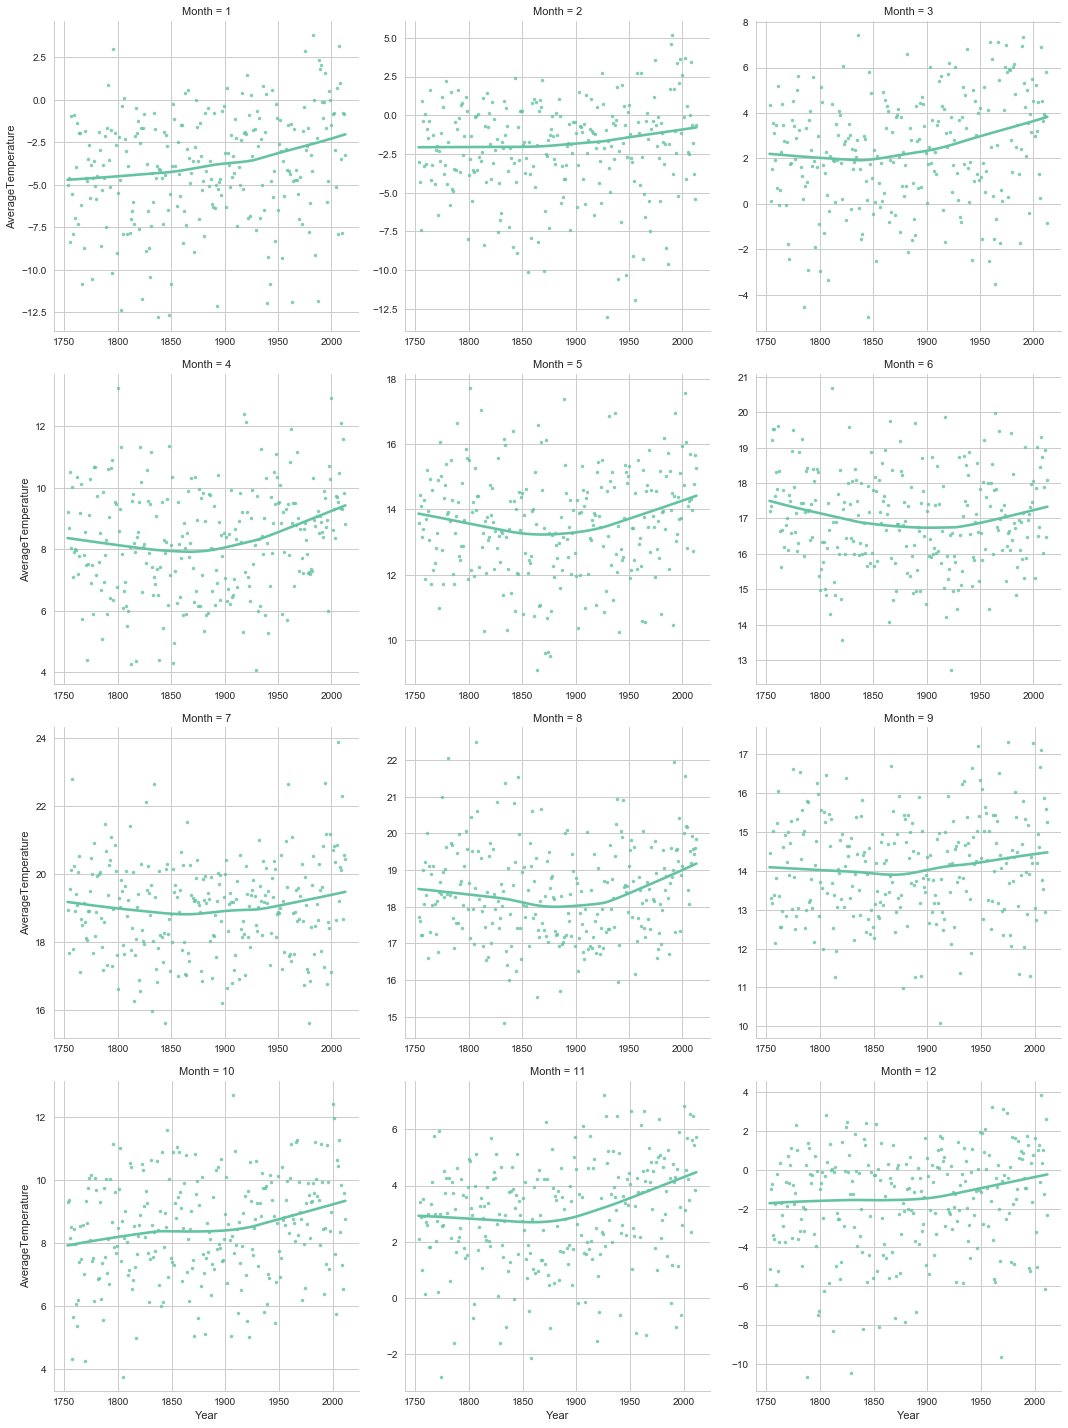

In [8]:
sns.lmplot(y="AverageTemperature", x="Year", data=climate_city, 
           lowess=True, markers=".", col="Month", col_wrap=3, sharex=False, sharey=False)

PoniÅ¼ej zaÅ› moÅ¼na zobaczyÄ‡ zakresy temperatur, jakie zdarzaÅ‚y siÄ™ w caÅ‚ym zbiorze danych przez te nieco ponad 200 lat.

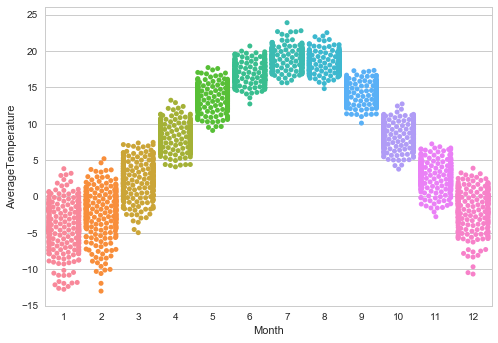

In [9]:
sns.swarmplot(x='Month', y='AverageTemperature', data=climate_city)

Taka prezentacja danych nie mÃ³wi jednak wiele o tym, co jest szczegÃ³lnie istotne w kontekÅ›cie globalnego ocieplenia, czyli o trendzie. SprawdÅºmy jak to wyglÄ…da.

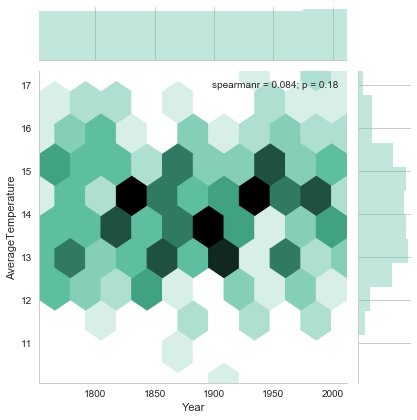

In [10]:
from scipy.stats import spearmanr

sns.jointplot(month_city['Year'], month_city['AverageTemperature'], 
              kind="hex", stat_func=spearmanr)

Co to mÃ³wi? Coraz ciemniejsze szeÅ›ciokÄ…ty w gÃ³rnej czÄ™Å›ci wykresu w miarÄ™ upÅ‚ywu czasu wskazujÄ… na coraz czÄ™stsze odchylenia temperatury w gÃ³rÄ™.

### Åšrednie temperatury w jednym miesiÄ…cu

WybraÅ‚em jeden miesiÄ…c (taki jak jest teraz) i sprawdziÅ‚em, jak czÄ™sto wystÄ™powaÅ‚a dana temperatura. SprawdÅºmy jak to byÅ‚o porÃ³wnujÄ…c wszystkie dostÄ™pne dane (1753-2013) z okresem po 1970 oraz 1995 roku (niedÅ‚ugo przed El NiÃ±o).

Warto zwrÃ³ciÄ‡ uwagÄ™, Å¼e jeÅ›li miesiÄ…cem zdefiniowanym w `MONTH` jest wrzesieÅ„, zmiana nie jest duÅ¼a. Wynika to z tego, Å¼e ten akurat miesiÄ…c aÅ¼ tak bardzo siÄ™ nie ociepliÅ‚ na przestrzeni lat (co widaÄ‡ tam, gdzie jest tak duÅ¼o wykresÃ³w :) ). Polecam zmieniÄ‡ wartoÅ›Ä‡ zmiennej `MONTH` i uruchomiÄ‡ dwie komÃ³rki poniÅ¼ej.

In [11]:
before_1970 = month_city[month_city['Year'] < RISE_START_YEAR]['AverageTemperature'].copy()
after_1970 = month_city[month_city['Year'] >= RISE_START_YEAR]['AverageTemperature'].copy()
after_1995 = month_city[month_city['Year'] >= 1995]['AverageTemperature'].copy()

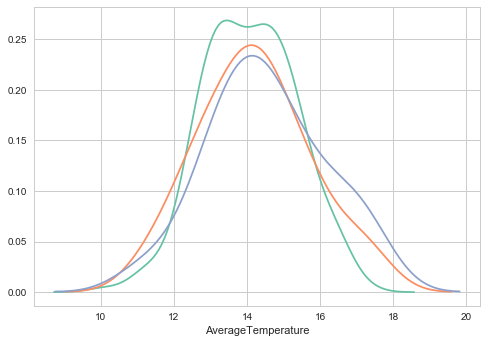

In [12]:
fig, ax = plt.subplots()
sns.distplot(before_1970, hist=False, ax=ax)
sns.distplot(after_1970, hist=False, ax=ax)
sns.distplot(after_1995, hist=False, ax=ax)

W drugim i trzecim przypadku danych oczywiÅ›cie nie ma zbyt duÅ¼o (43 i 19 pomiarÃ³w), ale da siÄ™ zauwaÅ¼yÄ‡, Å¼e zwiÄ™ksza siÄ™ prawdopodobieÅ„stwo wystÄ…pienia temperatury w okolicach 19 stopni.

### Kostka klimatyczna

Kostka klimatyczna jest koncepcjÄ…, ktÃ³ra ma uÅ‚atwiÄ‡ zrozumienie tego, Å¼e globalne ocieplenie, zwÅ‚aszcza w poczÄ…tkowej fazie, nie oznacza, Å¼e nie bÄ™dzie zim w ogÃ³le, a tylko to, Å¼e bÄ™dÄ… one rzadziej.

ZaÅ‚Ã³Å¼my, Å¼e pomalowaliÅ›my Å›ciany kostki na trzy kolory: czerwony, biaÅ‚y i niebieski oznaczajÄ…ce odpowiednio od wysokich, przez Å›rednie, do niskich temperatur. Dostosujmy te przedziaÅ‚y tak, Å¼eby prawdopodobieÅ„stwa byÅ‚y analogiczne do szans, Å¼e wypadnie Å›ciana kostki zamalowana danym kolorem.
Globalne ocieplenie sprawia, Å¼e dodatkowe Å›ciany kostki zostajÄ… zamalowane na czerwono.

W tym notebooku zmieniÅ‚em trochÄ™ tÄ™ koncepcjÄ™ â€”Â zamiast Å›cian kostki, pokazujÄ™ liczbÄ™ miesiÄ™cy w roku, ktÃ³re uznalibyÅ›my za ciepÅ‚e, normalne lub chÅ‚odne (ciepÅ‚e jak na styczeÅ„, itd.) Zobaczmy, jak to wyglÄ…da.

In [13]:
def label_bin(row):
    if row['AverageTemperature'] < (row['MonthMeanBaseline'] - row['MonthStdBaseline']):
        return 'Low'
    elif row['AverageTemperature'] > (row['MonthMeanBaseline'] + row['MonthStdBaseline']):
        return 'High'
    return 'Medium'

In [14]:
monthly_frames = []
for i, group in climate_city.groupby('Month'):
    g2 = group.copy()
    g_temp_series = g2[(g2['Year'] >= BASE_YEAR_START) & (g2['Year'] <= BASE_YEAR_END)]['AverageTemperature']
    g2['MonthMeanBaseline'] = g_temp_series.mean()
    g2['MonthStdBaseline'] = g_temp_series.std()
    g2['TemperatureBin'] = g2.apply(label_bin, axis=1)
    monthly_frames.append(g2)

In [15]:
all_with_bins = pd.concat(monthly_frames).sort_index()
city_grouped_with_counted_bins = all_with_bins.groupby(['Year','TemperatureBin'])['City'] \
    .agg(['count']).reset_index()

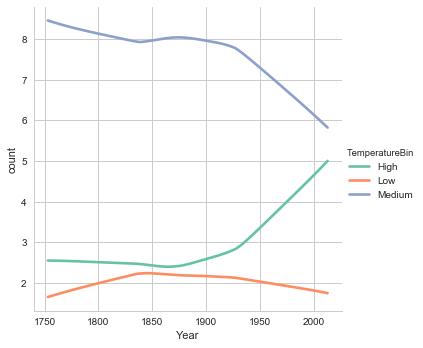

In [16]:
sns.lmplot(x='Year', y='count', hue='TemperatureBin', 
           data=city_grouped_with_counted_bins, 
           scatter=False, lowess=True)

Spadek iloÅ›ci miesiÄ™cy o temperaturze "normalnej" w okresie bazowym (1850-1900) jest aÅ¼ nadto widoczny. 

### krÃ³tkie info o tym, co jest okresem bazowym w badaniu zmian klimatu

Na moje pytanie:

(...) OtÃ³Å¼ zrobiÅ‚em maÅ‚a analizÄ™ zmian temperatury lÄ…du na podstawie
zbioru danych z Berkeley. ChciaÅ‚em jednak to pokrÃ³tce opisaÄ‡ i nie
mogÄ™ doszukaÄ‡ siÄ™ informacji na temat tego, co paryskie porozumienie
definiuje jako erÄ™ pre-industrialnÄ…. ZnalazÅ‚em jedynie coÅ› takiego:
https://www.climate-lab-book.ac.uk/2017/defining-pre-industrial/ 
PaÅ„stwo pewnie macie tÄ™ informacjÄ™ po prostu w gÅ‚owie, stÄ…d moje
pytanie ðŸ™‚ BÄ™dÄ™ bardzo wdziÄ™czny i dzisiaj podeÅ›lÄ™ linka ðŸ™‚


----------

Niestety, w porozumieniu (przezornie?) nie podano Å›cisÅ‚ej definicji tego terminu. Klasycznie uznaje siÄ™, Å¼e "epoka przedprzemysÅ‚owa" oznacza "przed rokiem 1750". Z praktycznych wzglÄ™dÃ³w - przede wszystkim dostÄ™pnoÅ›ci danych - punkt odniesienia wykresÃ³w czy podawanych wartoÅ›ci jest jednak pÃ³Åºniejszy, np. okres przed 1850, 1850-1900, 1801-1900, pierwsze 30 lat danej serii pomiarowej. 

Z jednej strony, pewnie wielu osobom bÄ™dzie teraz zaleÅ¼aÅ‚o na dokÅ‚adnym ustaleniu, co ma oznaczaÄ‡ "przedprzemysÅ‚owe" (przykÅ‚adem jest artykuÅ‚, ktÃ³ry Pan linkuje), Å¼eby mÃ³c Å›ledziÄ‡, czy juÅ¼ nam te 1,5C stuknÄ™Å‚o, czy nie. Z drugiej - nie ma to wielkiego znaczenia o tyle, Å¼e 
 
 - na poczÄ…tku ery przemysÅ‚owej zmiany globalnej Å›redniej temperatury
   byÅ‚y jeszcze niewielkie, wiÄ™c to niewielka rÃ³Å¼nica, jaki okres
   weÅºmiemy jako referencyjny,
 - progi 1,5 oraz 2C sÄ… wyznaczone do pewnego stopnia arbitralnie (jako
   okrÄ…gÅ‚e liczby, ktÃ³re _powinny_ nam zapewniÄ‡, Å¼e nie przekroczymy
   _wiÄ™kszoÅ›ci_ "tipping points", czy Å¼e nie przekroczymy ich z prawdopodobieÅ„stwem "wiÄ™kszym niÅ¼ x" 
   http://naukaoklimacie.pl/aktualnosci/ziemskie-progi-bezpieczenstwa-193),
 - nawet jeÅ›li wyhamujemy z emisjami, to przecieÅ¼ nie wstrzelimy siÄ™
   rÃ³wno w 1,5 czy 2C (liczone od dowolnego poziomu odniesienia), moÅ¼emy
   mieÄ‡ nadziejÄ™, Å¼e na poziomie 2,2C jeszcze nic siÄ™ wielkiego nie
   stanie, ale jest teÅ¼ pewne prawdpodobieÅ„stwo, Å¼e juÅ¼ przy 1,8C
   uruchomi siÄ™ duÅ¼o sprzÄ™Å¼eÅ„ zwrotnych.

Na Pana miejscu przyjÄ™Å‚abym jako punkt odniesienia okres 1850-1900, bo jest on powszechie wykorzystywany w praktyce (np. w podsumowaniu http://naukaoklimacie.pl/aktualnosci/1-5-czy-2-stopnie-co-to-w-ogole-za-roznica-191) i to pewnie projekcje z takim okresem referencyjnym oglÄ…dali politycy (np. w raporcie Global Carbon Budget -zaÅ‚Ä…czony obrazek). Dla unikniÄ™cia wÄ…tpliwoÅ›ci moÅ¼na zaznaczyÄ‡, Å¼e przyjÄ…Å‚ go Pan w Å›lad za innymi i Å¼e choÄ‡ sÄ… w tej kwestii pewne rozbieÅ¼noÅ›ci to tak w sumie nie robi to wielkiej rÃ³Å¼nicy (na wykresie http://naukaoklimacie.pl/aktualnosci/ziemskie-progi-bezpieczenstwa-193 widaÄ‡, jak pÅ‚aski byÅ‚ wykres przed XIX wiekiem.


----------


Z tego miejsca dziÄ™kujÄ™ Pani Aleksandrze :)